In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import umap


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [4]:
dfcols = []
for i in range(561):
    dfcols.append(i+1)


In [5]:
lf = pd.read_csv("y_train.txt", names=["col"])
df = pd.read_csv("X_train.txt", names = dfcols, delim_whitespace=True)

In [6]:
lf.col.unique()

array([5, 4, 6, 1, 3, 2], dtype=int64)

In [7]:
df.shape

(7352, 561)

In [8]:
df.isnull().values.any()

False

In [9]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,552,553,554,555,556,557,558,559,560,561
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [10]:
maxval = df.max().max()
print(maxval)

1.0


In [11]:
minval = df.min().min()
print(minval)

-1.0


In [12]:
reducer = umap.UMAP(n_components=3)

In [13]:
dfdata = df[dfcols]

In [14]:
#scaled_data = StandardScaler().fit_transform(dfdata)

In [15]:
embedding = reducer.fit_transform(dfdata)
embedding.shape

(7352, 3)

Text(0.5, 0.92, '3 dimensions')

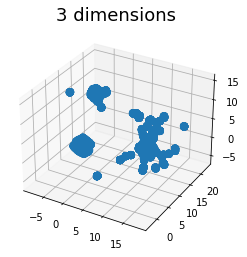

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], s=50)
plt.title("3 dimensions", fontsize=18)
#fig.savefig("3d-no-clusters.png")

In [17]:
from time import process_time

In [18]:
ngh = NearestNeighbors(n_neighbors=2)
neibs = ngh.fit(dfdata)
distances, indices = neibs.kneighbors(dfdata)

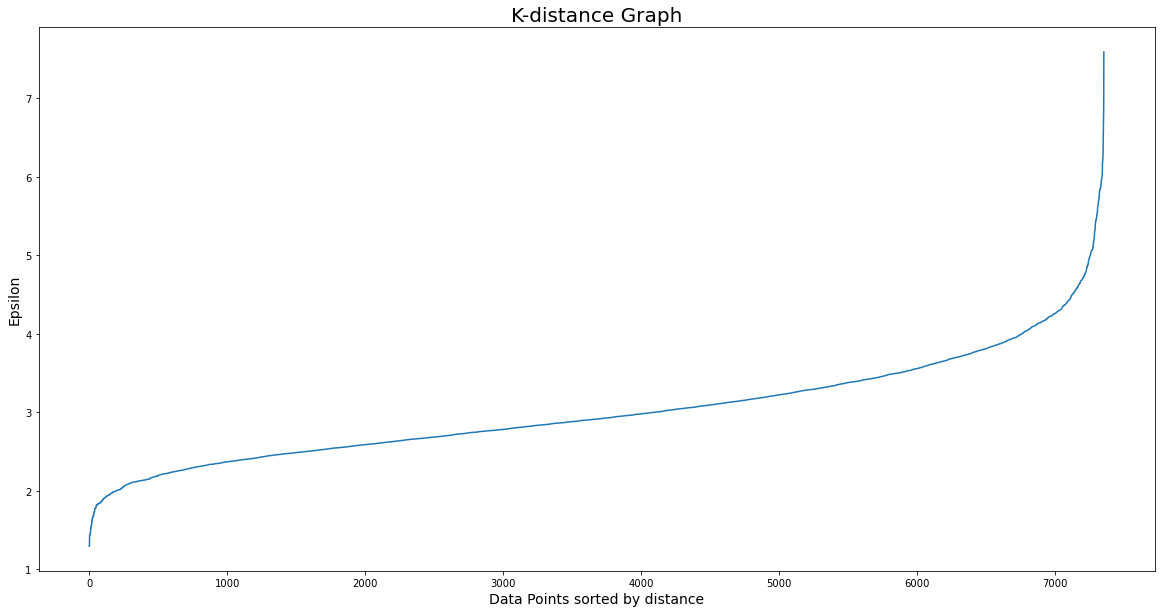

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
#plt.savefig("kdist-fulld.png")
plt.show()

In [20]:
ngh = NearestNeighbors(n_neighbors=2)
neibs = ngh.fit(embedding)
distances, indices = neibs.kneighbors(embedding)

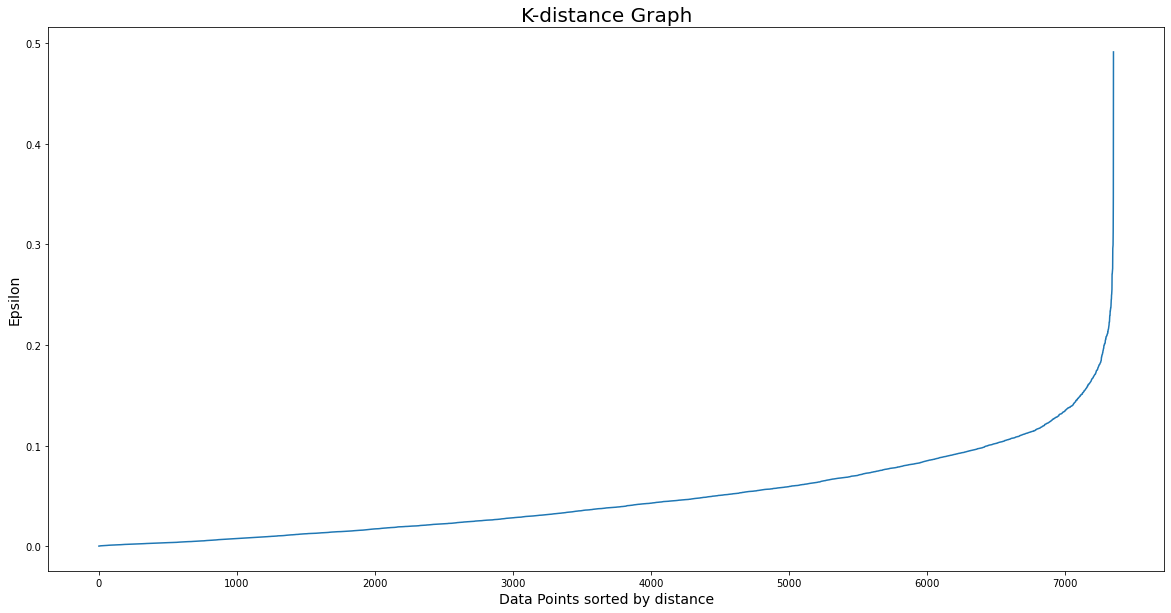

In [21]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
#plt.savefig("kdist-lowd.png")
plt.show()

In [22]:
dbscan = DBSCAN(eps=4.5, min_samples=9)

In [23]:
timestart = process_time()
dbscan.fit(df)
timestop = process_time()


In [24]:
print(f"{timestop-timestart} seconds")

62.84375 seconds


In [25]:
dbscan2 = DBSCAN(eps=0.2, min_samples=9)


In [26]:
timestart = process_time()
dbscan2.fit(embedding)
timestop = process_time()


In [27]:
print(f"{timestop-timestart} seconds")

0.09375 seconds


In [28]:
bigscanlabels = dbscan.labels_

In [29]:
smallscanlabels = dbscan2.labels_

In [30]:
n_clusters_ = len(set(bigscanlabels)) - (1 if -1 in bigscanlabels else 0)
n_noise_ = list(bigscanlabels).count(-1)

print('Estimated number of clusters without dimensionality reduction: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters without dimensionality reduction: 3
Estimated number of noise points: 489


In [31]:
n_clusters_ = len(set(smallscanlabels)) - (1 if -1 in smallscanlabels else 0)
n_noise_ = list(smallscanlabels).count(-1)

print('Estimated number of clusters with dimensionality reduction: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters with dimensionality reduction: 83
Estimated number of noise points: 464


Text(0.5, 0.92, 'Cluster plot')

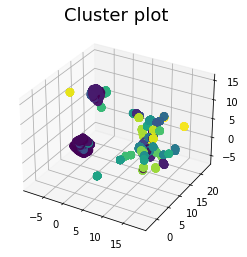

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], s=50, c=smallscanlabels.astype(float))
plt.title("Cluster plot", fontsize=18)
#fig.savefig("3d-with-clusters.png")

In [33]:
dbscan3 = DBSCAN(eps=0.3, min_samples=10)
dbscan3.fit(embedding)
scanlabels = dbscan3.labels_
n_clusters_ = len(set(scanlabels)) - (1 if -1 in scanlabels else 0)
n_noise_ = list(scanlabels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 53
Estimated number of noise points: 43


Text(0.5, 0.92, 'Cluster plot')

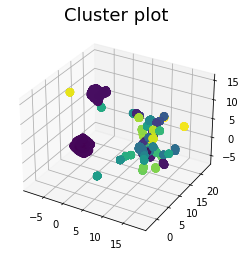

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding[:,0], embedding[:,1], embedding[:,2], s=50, c=scanlabels.astype(float))
plt.title("Cluster plot", fontsize=18)

In [37]:
dbscan4 = DBSCAN(eps=4.5,min_samples=9,n_jobs=-1)
clusters = dbscan4.fit_predict(df)


In [38]:
clusters

array([-1,  0,  0, ...,  1,  1,  1], dtype=int64)

In [39]:
bigscanlabels = dbscan4.labels_
n_clusters_ = len(set(bigscanlabels)) - (1 if -1 in bigscanlabels else 0)
n_noise_ = list(bigscanlabels).count(-1)

print('Estimated number of clusters without dimensionality reduction: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters without dimensionality reduction: 3
Estimated number of noise points: 489


In [41]:
asd = np.unique(clusters)

In [48]:
n = 0
for i in range(len(clusters)):
    if clusters[i] == -1:
        n += 1
print(n)
#this is to test which cluster contains the noise, the result is that cluster -1 is the noise data

489


In [60]:
def compare_clusters(labelframe, clusterarray):
    '''create list which maps each item to which cluster and activity it belongs to'''
    comparisonlist = []
    for i in range(len(clusterarray)):
        applist = []
        cluster = clusterarray[i]
        activity = labelframe.iloc[i,0]
        applist.append(cluster)
        applist.append(activity)
        comparisonlist.append(applist)
    return comparisonlist

In [61]:
clustermap = compare_clusters(lf,clusters)

[[-1, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [0, 5],
 [-1, 4],
 [0, 4],
 [0, 4],
 [-1, 4],
 [-1, 4],
 [-1, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 4],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [-1, 6],
 [0, 6],
 [-1, 6],
 [-1, 6],
 [0, 6],
 [-1, 6],
 [-1, 6],
 [-1, 6],
 [-1, 6],
 [-1, 6],
 [-1, 6],
 [0, 6],
 [0, 6],
 [0, 6],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 1],
 [1, 

In [68]:
#from the previous cell it seems that most of the activity is grouped into cluster 0 and 1
#lets see what activity is found in cluster 2
cluster2 = []
for i in range(len(clustermap)):
    if clustermap[i][0] == 2:
        cluster2.append(clustermap[i])
cluster2

[[2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6],
 [2, 6]]

In [70]:
#here we test what percent of data in cluster 0 represents standing, sitting, or laying down
cluster0 = []
for i in range(len(clustermap)):
    if clustermap[i][0] == 0:
        cluster0.append(clustermap[i])

num = 0        
for i in range(len(cluster0)):
    if cluster0[i][1] == 4 or cluster0[i][1] == 5 or cluster0[i][1] == 6:
        num += 1
percent = float(num/len(cluster0))
print(percent)


1.0


In [72]:
#here we test what percent of data in cluster 1 represents walking, walking up, or walking down
cluster1 = []
for i in range(len(clustermap)):
    if clustermap[i][0] == 1:
        cluster1.append(clustermap[i])

num = 0        
for i in range(len(cluster1)):
    if cluster1[i][1] == 1 or cluster1[i][1] == 2 or cluster1[i][1] == 3:
        num += 1
percent = float(num/len(cluster1))
print(percent)

1.0
